=== Binary Logistic Regression ===
Confusion Matrix:
[[50  0]
 [ 0 50]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

ROC-AUC Score: 1.00


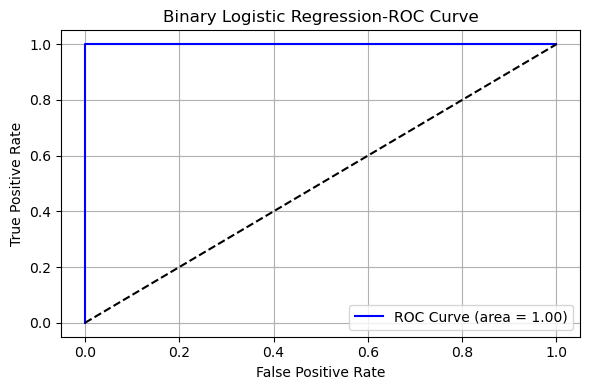

C:\Users\bikra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Multiclass Logistic Regression ===
Confusion Matrix:
[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.90      0.94        50
   virginica       0.91      0.98      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Macro ROC-AUC Score: 0.99


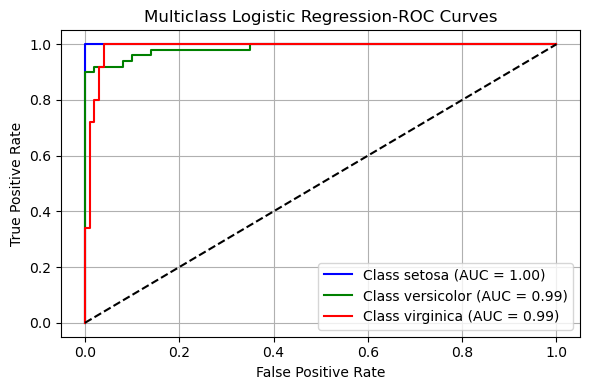

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

#------------------------
# Binary Logistic Regression
#------------------------
# Filter for Setosa and Versicolor (classes 0 and 1)
binary_filter = y < 2
X_bin = X[binary_filter]
y_bin = y[binary_filter]

# Train binary logistic model
model_bin = LogisticRegression()
model_bin.fit(X_bin, y_bin)
y_bin_pred = model_bin.predict(X_bin)
y_bin_prob = model_bin.predict_proba(X_bin)[:, 1]

# Evaluation metrics for binary classification
print("=== Binary Logistic Regression ===")
print("Confusion Matrix:")
print(confusion_matrix(y_bin, y_bin_pred))
print("Classification Report:")
print(classification_report(y_bin, y_bin_pred, target_names=target_names[:2]))
print(f"ROC-AUC Score: {roc_auc_score(y_bin, y_bin_prob):.2f}")

# Plot ROC Curve (Binary)
fpr, tpr, _ = roc_curve(y_bin, y_bin_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {auc(fpr, tpr):.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Binary Logistic Regression-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("binary_roc_curve.png")
plt.show()

#------------------------
# Multiclass Logistic Regression
#------------------------
# One-vs-Rest strategy (default in scikit-learn)
model_multi = LogisticRegression(multi_class='ovr', solver='liblinear')
model_multi.fit(X, y)
y_multi_pred = model_multi.predict(X)
y_multi_prob = model_multi.predict_proba(X)

# Binarize y for ROC-AUC calculation
y_binarized = label_binarize(y, classes=[0, 1, 2])

# Evaluation metrics for multiclass
print("\n=== Multiclass Logistic Regression ===")
print("Confusion Matrix:")
print(confusion_matrix(y, y_multi_pred))
print("Classification Report:")
print(classification_report(y, y_multi_pred, target_names=target_names))
print(f"Macro ROC-AUC Score: {roc_auc_score(y_binarized, y_multi_prob, average='macro'):.2f}")

# Plot ROC curves for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_multi_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(6,4))
for i, color in zip(range(3), ['blue', 'green', 'red']):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'Class {target_names[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multiclass Logistic Regression-ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig("multiclass_roc_curve.png")
plt.show()